In [1]:
import sys
sys.path.append(r'..//')
from ioMicro import *

In [5]:
save_folder =r'\\192.168.0.100\bbfish100\DCBBL1_1year1wkNJ_ASO_SAL_4_18_2023\MERFISH_Analysis'
save_folder_from =r'\\192.168.0.100\bbfish100\DCBBL1_4week_6_2_2023\MERFISH_Analysis'
import shutil
for icol in range(4):
    shutil.copy2(save_folder_from+os.sep+'med_col_raw'+str(icol)+'.npz',
                 save_folder+os.sep+'med_col_raw'+str(icol)+'.npz')

### Pick a few calibration FOVs

Loaded decoded: -3.6840410232543945


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:07<00:00,  6.15it/s]


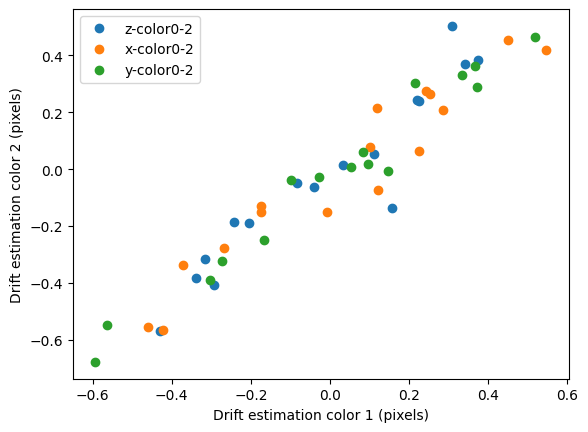

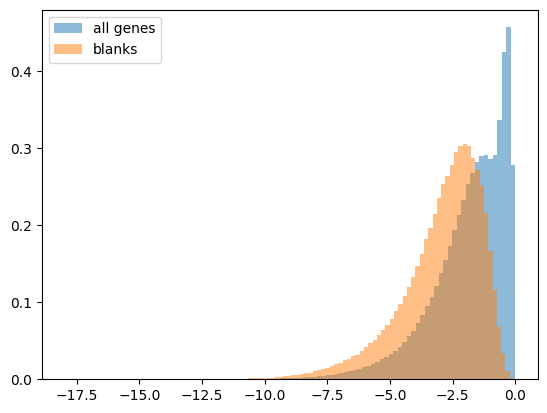

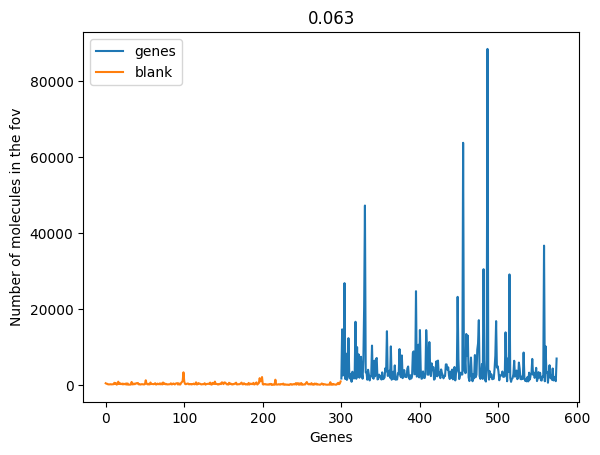

In [54]:
save_folder =r'\\192.168.0.100\bbfish100\DCBBL1_1year1wkNJ_ASO_SAL_4_18_2023\MERFISH_Analysis'
fov,set_ = 'Conv_zscan__191', '_set1'#56
dec = decoder_simple(save_folder,fov,set_)
dec.ncols = 3
dec.load_decoded()
apply_flat_field(dec)
apply_fine_drift(dec,plt_val=True)
scoresRefT = get_score_per_color(dec)

get_score_withRef(dec,scoresRef,plt_val=True,gene=None,iSs = None)
dec.th=-1.5
plot_statistics(dec)

In [27]:
viewer = plot_multigenes(dec,genes=['Sox11','Ptbp1','Gad1','Igfbpl1','Dsp','Psap'],colors=['r','g','b','m','c','y','w'],viewer = None,
                         smin=2,smax=10)

In [28]:
if True:
    if scoresRef is None: scoresRef=scoresRefT
    else: combine_scoresRef(scoresRef,scoresRefT)
    np.save(save_folder+os.sep+'scoresRef.npy',scoresRef)

C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\site-packages\numpy\lib\npyio.py:521: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [8]:
scoresRef = None

### Calibrate smFISH signal

In [29]:
keepf =  dec.scoreA>dec.th ### keep good score
icodesf = dec.icodesN[keepf]
XHfpr = dec.XH_pruned[keepf]
XHf = np.mean(XHfpr,axis=1)
XF = XHf[:,[0,1,2,-5,-4,-3,-2,-1,-1,-1,-1]]
#zc,xc,yc,bk-7,a-6,habs-5,hn-4,h-3
XF[:,-1] = dec.scoreA[keepf]
XF[:,-2] = np.where(keepf)[0]
mnD = np.mean(np.linalg.norm((XHf[:,np.newaxis]-XHfpr)[:,:,:3],axis=-1),axis=-1)
XF[:,-3]=mnD
mnH = np.mean(np.abs((XHf[:,np.newaxis]-XHfpr)[:,:,-3]),axis=-1)
XF[:,-4]=mnH
genesf = dec.gns_names[icodesf]

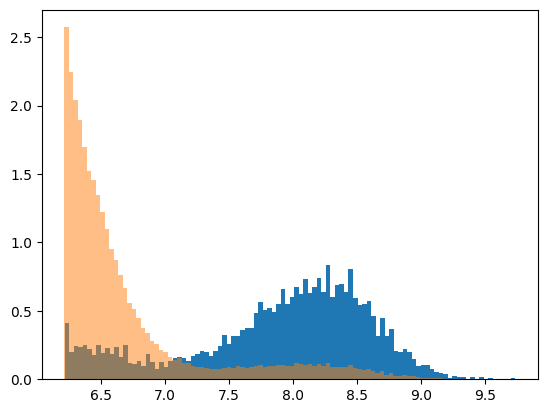

In [42]:
gene = 'Ptbp1'
tagH = 'Ptbp1'


XF_gene = XF[genesf==gene]
icol = XF_gene[0,-5].astype(int)

dec.get_XH_tag(tag = tagH)#Aldh
#Xh = norm_brightness(dec,dec.Xh)
Xh = dec.Xh
Xh = Xh[(Xh[:,-2]==icol)&(Xh[:,-3]>500)]


dsts,inds = cKDTree(Xh[:,:3]).query(XF_gene[:,:3])
Xh_ = Xh[inds[(dsts<10)],:]
plt.hist(np.log(Xh_[:,-3]),bins=100,density=True);
plt.hist(np.log(Xh[:,-3]),bins=100,density=True,alpha=0.5);

In [38]:
np.exp(7.5),icol

(1808.0424144560632, 2)

In [14]:
[3000,2500,2000]

### Given the base decoding for each fov, run across all datasets with consistent values

In [43]:
from ioMicro import *
save_folder =r'\\192.168.0.100\bbfish100\DCBBL1_1year1wkNJ_ASO_SAL_4_18_2023\MERFISH_Analysis'
scoresRef = np.load(save_folder+os.sep+'scoresRef.npy',allow_pickle=True)

In [45]:
fov_fls = glob.glob(save_folder+os.sep+'fov*')
elems = [(fov.replace('.zarr',''),fov_fl.split('__')[-1].split('.')[0]) 
 for fov_fl in fov_fls for fov in np.load(fov_fl)]
len(elems)

1278

In [46]:
dec_fls = glob.glob(save_folder+os.sep+"decoded*")
elems_dec = [tuple(fl.split('decoded_')[-1].replace('.npz','').split('--')) for fl in dec_fls]
len(elems_dec)

1276

In [47]:
len(elems_dec),len(elems)

(1276, 1278)

In [48]:
[e for e in elems if e not in elems_dec]

[('Conv_zscan__141', '_set1'), ('Conv_zscan__066', '_set3')]

In [4]:
from workerScope3New import *
main_f(('_set1',693),try_mode=True)

Computing fitting on: Conv_zscan__693.zarr
19 ['\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H0__set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\P1__Igfbp_Aldh1l1_Ptbp1__set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H1_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\P2_Sox11_Sox2_Dcx__set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H2_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H3_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H4_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H5_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H6_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H7_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H8_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H9_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H10_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4we

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:49<00:00,  2.61s/it]


Computing drift on: Conv_zscan__693.zarr
Computing drift...


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [04:24<00:00, 13.94s/it]


Not completed


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [04:28<00:00, 89.57s/it]


Unfolded molecules: 106.27258110046387
Computed the decoding: 121.2147626876831


100%|███████████████████████████████████████████████████████████████████| 12709952/12709952 [02:16<00:00, 93140.05it/s]


Computed best unique assigment: 138.94816875457764


('_set1', 693)

In [5]:
from workerScope3New import *
for set_fov in [('_set1',693),('_set1',694),('_set1',695),('_set1',696),('_set1',697),('_set2',2),('_set2',5)]:
    main_f(set_fov,try_mode=True)

Computing fitting on: Conv_zscan__693.zarr
19 ['\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H0__set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\P1__Igfbp_Aldh1l1_Ptbp1__set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H1_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\P2_Sox11_Sox2_Dcx__set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H2_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H3_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H4_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H5_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H6_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H7_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H8_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H9_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H10_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4we

100%|█████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 449.32it/s]

Computing drift on: Conv_zscan__693.zarr
Completed


Computing fitting on: Conv_zscan__694.zarr
19 ['\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H0__set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\P1__Igfbp_Aldh1l1_Ptbp1__set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H1_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\P2_Sox11_Sox2_Dcx__set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H2_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H3_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H4_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H5_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H6_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H7_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H8_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H9_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H10_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4we

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:46<00:00,  2.43s/it]


Computing drift on: Conv_zscan__694.zarr
Computing drift...


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [04:24<00:00, 13.92s/it]


Not completed


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [04:06<00:00, 82.21s/it]


Unfolded molecules: 99.43702483177185
Computed the decoding: 113.60664319992065


100%|███████████████████████████████████████████████████████████████████| 11926505/11926505 [02:07<00:00, 93740.81it/s]


Computed best unique assigment: 129.5688931941986
Computing fitting on: Conv_zscan__695.zarr
19 ['\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H0__set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\P1__Igfbp_Aldh1l1_Ptbp1__set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H1_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\P2_Sox11_Sox2_Dcx__set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H2_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H3_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H4_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H5_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H6_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H7_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H8_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H9_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H10_ME

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:44<00:00,  2.35s/it]


Computing drift on: Conv_zscan__695.zarr
Computing drift...


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [04:17<00:00, 13.58s/it]


Not completed


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [03:09<00:00, 63.16s/it]


Unfolded molecules: 76.06737637519836
Computed the decoding: 86.13120317459106


100%|█████████████████████████████████████████████████████████████████████| 9284014/9284014 [01:39<00:00, 93440.24it/s]


Computed best unique assigment: 101.13644862174988
Computing fitting on: Conv_zscan__696.zarr
19 ['\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H0__set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\P1__Igfbp_Aldh1l1_Ptbp1__set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H1_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\P2_Sox11_Sox2_Dcx__set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H2_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H3_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H4_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H5_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H6_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H7_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H8_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H9_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H10_M

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:46<00:00,  2.47s/it]


Computing drift on: Conv_zscan__696.zarr
Computing drift...


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [04:19<00:00, 13.65s/it]


Not completed


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [03:59<00:00, 79.84s/it]


Unfolded molecules: 94.53502345085144
Computed the decoding: 105.49490714073181


100%|███████████████████████████████████████████████████████████████████| 11183391/11183391 [02:00<00:00, 92648.77it/s]


Computed best unique assigment: 122.87898826599121
Computing fitting on: Conv_zscan__697.zarr
19 ['\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H0__set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\P1__Igfbp_Aldh1l1_Ptbp1__set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H1_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\P2_Sox11_Sox2_Dcx__set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H2_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H3_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H4_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H5_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H6_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H7_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H8_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H9_MER_set1', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H10_M

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:47<00:00,  2.51s/it]


Computing drift on: Conv_zscan__697.zarr
Computing drift...


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [04:21<00:00, 13.74s/it]


Not completed


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [04:29<00:00, 89.88s/it]


Unfolded molecules: 106.64303040504456
Computed the decoding: 129.96516299247742


100%|███████████████████████████████████████████████████████████████████| 13433196/13433196 [02:26<00:00, 91942.52it/s]


Computed best unique assigment: 148.7571897506714
Computing fitting on: Conv_zscan__002.zarr
19 ['\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H0__set2', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\P1__Igfbp_Aldh1l1_Ptbp1__set2', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H1_MER_set2', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\P2_Sox11_Sox2_Dcx__set2', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H2_MER_set2', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H3_MER_set2', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H4_MER_set2', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H5_MER_set2', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H6_MER_set2', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H7_MER_set2', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H8_MER_set2', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H9_MER_set2', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H10_ME

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:47<00:00,  2.49s/it]


Computing drift on: Conv_zscan__002.zarr
Computing drift...


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [04:42<00:00, 14.85s/it]


Not completed


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [04:25<00:00, 88.62s/it]


Unfolded molecules: 103.37909722328186
Computed the decoding: 114.95663142204285


100%|███████████████████████████████████████████████████████████████████| 11482626/11482626 [02:05<00:00, 91773.06it/s]


Computed best unique assigment: 127.3968620300293
Computing fitting on: Conv_zscan__005.zarr
19 ['\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H0__set2', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\P1__Igfbp_Aldh1l1_Ptbp1__set2', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H1_MER_set2', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\P2_Sox11_Sox2_Dcx__set2', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H2_MER_set2', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H3_MER_set2', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H4_MER_set2', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H5_MER_set2', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H6_MER_set2', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H7_MER_set2', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H8_MER_set2', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H9_MER_set2', '\\\\192.168.0.100\\bbfish100\\DCBBL1_4week_6_2_2023\\H10_ME

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:48<00:00,  2.54s/it]


Computing drift on: Conv_zscan__005.zarr
Not completed


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [04:44<00:00, 94.73s/it]


Unfolded molecules: 112.62374472618103
Computed the decoding: 132.327871799469


100%|███████████████████████████████████████████████████████████████████| 13253852/13253852 [02:24<00:00, 91455.46it/s]


Computed best unique assigment: 147.57151699066162


False

In [50]:
fov,set_ = ('Conv_zscan__029', '_set1')
save_final_decoding(save_folder,fov,set_,scoresRef,th=-1.5,plt_val=False,tag_save = 'finaldecs_',apply_flat=True,ncols=3,
                            tags_smFISH=['Aldh','Sox11'],
                            genes_smFISH=[['Igfbpl1','Aldh1l1','Ptbp1'],['Sox11','Sox2','Dcx']],Hths=[3000,2500,2000],force=False)

Failed Conv_zscan__029 _set1


### Run workerSaveFinal

In [ ]:
#elems = [('Conv_zscan__'+str(ifov).zfill(3),'_'+set_)for set_ in ['set2'] for ifov in dic_f[set_]]
for fov,set_ in tqdm(elems):
    save_final_decoding(save_folder,fov,set_,scoresRef,th=-1.5,plt_val=False,tag_save = 'finaldecs_',apply_flat=False,ncols=3,
                            tags_smFISH=['Aldh','Sox11'],
                            genes_smFISH=[['Igfbpl1','Aldh1l1','Ptbp1'],['Sox11','Sox2','Dcx']],Hths=[10000,10000,8500],force=False)

In [5]:
import sys
sys.path.append(r'..\\')
from ioMicro import *
save_folder =r'\\192.168.0.100\bbfish100\DCBBL1_4week_6_2_2023\MERFISH_Analysis'

In [11]:
fls = glob.glob(save_folder+os.sep+'finaldecs_*')

In [16]:
times = [os.path.getctime(fl) for fl in fls]
np.mean(np.diff(np.sort(times).astype(int)))*900/60

125.64285714285715

### Get counts per cell into a single dataset

In [17]:
import pandas as pd
#save_folder =r'\\192.168.0.6\bbfish1e3\DCBBL1_03_14_2023_big\MERFISH_Analysis'
#save_folder =r'\\192.168.0.6\bbfish1e3\DCBBL1_03_14_2023_big\MERFISH_Analysis'
save_folder =r'\\192.168.0.100\bbfish100\DCBBL1_4week_6_2_2023\MERFISH_Analysis'
save_fls = glob.glob(save_folder+os.sep+'finaldecs_*')

In [18]:
len(save_fls)

826

In [90]:
save_fls_ = [fl for fl in save_fls if ('_set3' in fl)]# in fl if '035' in fl][0]
cell_df,df=None,None
for save_fl in tqdm(np.sort(save_fls_)[:]):
    ### load info
    dic = np.load(save_fl)
    XF = dic['XF']
    header = list(dic['header'])
    genes_decoded = dic['genes']
    cells = dic['cellinfo'][1:]
    header_cells = dic['header_cells']
    ### Rethrehold based on score
    iscore = list(header).index('score')
    scoreA = XF[:,iscore]
    keep = scoreA>-1.5
    ugns,gns_i = np.unique(genes_decoded[keep],return_inverse=True)

    icell = header.index('cell_id')
    icells = XF[keep,icell].astype(int)
    
    icellsf = cells[:,0].astype(int)
    
    mcell = np.max(icellsf)+1
    gn_cell,gn_cell_cts = np.unique(mcell*gns_i+icells,return_counts=True)
    len(gn_cell)
    igns_ = gn_cell//mcell
    icells_ = gn_cell%mcell
    Mcts = np.zeros([mcell,len(ugns)])
    Mcts[icells_,igns_]=gn_cell_cts

    Mcts[icellsf].shape
    ifov,iset = int(XF[0,header.index('ifov')]),int(XF[0,header.index('iset')])
    icellsnm = [icell+10**5*ifov for icell in icellsf]#icellsnm = [icell+10**5*ifov+10**9*iset for icell in icellsf]

    dfT = pd.DataFrame(Mcts[icellsf],columns=ugns,index=icellsnm)


    df = dfT if df is None else pd.concat([df,dfT])
    cell_dfT = pd.DataFrame(cells,columns=header_cells,index=icellsnm)
    cell_df = cell_dfT if cell_df is None else pd.concat([cell_df,cell_dfT])

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:34<00:00,  1.38it/s]


In [91]:
save_folder = r'\\192.168.0.100\bbfish100\DCBBL1_4week_6_2_2023\MERFISH_Analysis\final_spots'
if not os.path.exists(save_folder): os.makedirs(save_folder)
df.to_pickle(save_folder+r'\DCBBL1_4week_6_2_2023_set3_df_newCellSeg.pkl')
cell_df.to_pickle(save_folder+r'\DCBBL1_4week_6_2_2023_set3_cell_df_newCellSeg.pkl')

In [112]:
df = pd.read_pickle(save_folder+r'\DCBBL1_4week_6_2_2023_set1_df_newCellSeg.pkl')
cell_df = pd.read_pickle(save_folder+r'\DCBBL1_4week_6_2_2023_set1_cell_df_newCellSeg.pkl')

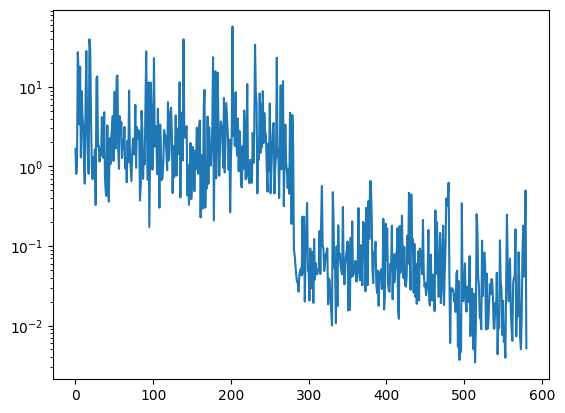

In [113]:
plt.semilogy(np.nanmean(df,axis=0))

In [93]:
          
def plot_gene_mosaic_cells(df,cell_df,gene,plt_fov=False,pixel_size = 0.10833*4,transpose=1,flipx=1,flipy=1,sz_min=1,sz_max=30,nmax=20):
    xcells = cell_df['xc']*pixel_size+cell_df['yfov']
    ycells = cell_df['yc']*pixel_size-cell_df['xfov']

    Xcells = np.array([xcells*flipx,ycells*flipy][::transpose]).T
    
    cts = np.array(df[gene])#Ptbp1_smFISH
    
    cts[np.isnan(cts)]=0
    ncts = np.clip(cts/nmax,0,1)
    size = sz_min+ncts*(sz_max-sz_min)
    from matplotlib import cm as cmap
    cols = cmap.coolwarm(ncts)
    import napari
    good_cells = slice(None)
    XC = -Xcells[good_cells,::-1]
    viewer = napari.view_points(XC,size=size,face_color=cols[good_cells],name=gene)
    if plt_fov:
        ifovs = np.array(list(df.index),dtype=int)//10**5
        ifov_unk = np.unique(ifovs)
        Xfov = np.array([np.mean(XC[ifovs==ifov],axis=0)for ifov in ifov_unk])
        features =  {'fov':ifov_unk}
        text = {
            'string': '{fov:.1f}',
            'size': 20,
            'color': 'gray',
            'translation': np.array([0, 0]),
        }
        viewer.add_points(Xfov,text=text,features=features,edge_width=0)

In [125]:
plot_gene_mosaic_cells(df,cell_df,'Dcx_sm',plt_fov=False,pixel_size = 0.10833*4,transpose=-1)

In [57]:
list(df.keys())

['Abhd2',
 'Acer3',
 'Acta2',
 'Actb',
 'Actg1',
 'Adarb2',
 'Adcy1',
 'Adcy2',
 'Adgrl3',
 'Agt',
 'Ahcyl2',
 'Aif1l',
 'Aldh1a1',
 'Aldh1l1_smFISH',
 'Aldoc',
 'Aqp4',
 'Arx',
 'Ascl1',
 'Atp1a2',
 'Atp1b1',
 'Auts2',
 'Bcl2',
 'Bdnf',
 'Bhlhe22',
 'Bmp2',
 'Bmp4',
 'Brinp3',
 'Bsg',
 'Bsn',
 'Btg2',
 'C1qa',
 'C1ql1',
 'C1ql3',
 'Calb1',
 'Calb2',
 'Casp3',
 'Casp9',
 'Cck',
 'Cd14',
 'Cd74',
 'Cdh12',
 'Cdh13',
 'Cdh18',
 'Cdk1',
 'Cdk4',
 'Chrdl1',
 'Clasp1',
 'Cldn5',
 'Cnr1',
 'Cntnap5b',
 'Cox6a1',
 'Csmd1',
 'Cspg4',
 'Cspg5',
 'Cst3',
 'Dcc',
 'Dcx',
 'Dcx_smFISH',
 'Dgat2',
 'Dgkb',
 'Dgkh',
 'Dlx1',
 'Dlx2',
 'Dpysl3',
 'Dsp',
 'Efna5',
 'Egfem1',
 'Eif4a2',
 'Elavl2',
 'Elavl3',
 'Elavl4',
 'Emx1',
 'Emx2',
 'Eomes',
 'Erbb4',
 'Etv4',
 'F3',
 'Fam107a',
 'Fam210b',
 'Fam214a',
 'Fbll1',
 'Flt1',
 'Fos',
 'Foxa1',
 'Foxa2',
 'Foxg1',
 'Frmd4a',
 'Frzb',
 'Fxyd6',
 'Fxyd7',
 'Fyn',
 'Gabbr1',
 'Gabra1',
 'Gabra2',
 'Gad1',
 'Gal',
 'Gda',
 'Gfap',
 'Gja1',
 'Gli1',
 'Gm1007